In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation

In [10]:
a = 1.3
b = 0.4
dataNum = 1000
parsentage = 0.3
#比例データ y = ax [average x = 0]
dataX = np.random.normal(0.5,0.3,size=dataNum)
dataY = (a*dataX+np.random.normal(0,0.04,size=dataNum)+b)
for i in range(int(dataNum*parsentage)):
    dataY[np.random.choice(np.arange(0,dataY.shape[0]))] += np.random.normal(0,0.3)
    #dataX[np.random.choice(np.arange(0,dataX.shape[0]))] += np.random.normal(0,0.3)

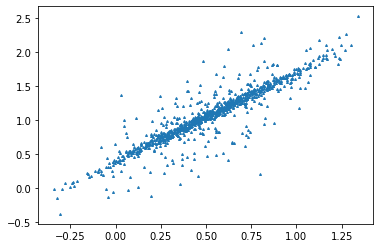

In [11]:
fig,ax = plt.subplots()
ax.plot(dataX,dataY,lw = 0,marker='^',markersize = 2)
Data = np.array([dataX,dataY]).T # [[x_0,y_0],[x_1,y_1],[x_2,y_2],[x_3,y_3]...]

In [12]:
fig,ax = plt.subplots(figsize=[10,10])

Artist = []

def Ransac(Data,sampleNum,threshold):
    global ax,Artist
    resalt = [0,0,1e90,None]
    for i in range(100):
        title = ax.text(0,0,"step : {}".format(i))
        DataCopy = Data.copy()
        SampleData = []
        for i in range(sampleNum):
            index = np.random.randint(DataCopy.shape[0])
            SampleData.append(DataCopy[index])
            DataCopy = np.delete(DataCopy,index,0)
        SampleData = np.array(SampleData)

        sampleAverage = [np.average(SampleData[:,0]),np.average(SampleData[:,1])]
        ExpA = np.sum((SampleData[:,0]-sampleAverage[0])*(SampleData[:,1]-sampleAverage[1]))/((SampleData[:,0]-sampleAverage[0])@(SampleData[:,0]-sampleAverage[0]))
        ExpB = sampleAverage[1] - ExpA*sampleAverage[0]

        a0 = ax.plot(SampleData[:,0],SampleData[:,1],lw=0,marker='o',markersize=5,c='r')
        a1 = ax.plot(np.array([0,1]),np.array([0,1])*ExpA+ExpB,c='b')

        Artist.append(a0+a1+[title])

        ExpTrueData = DataCopy[abs(DataCopy[:,0]*ExpA+ExpB - DataCopy[:,1]) < threshold]
        Score = np.sqrt((ExpTrueData[:,0]*ExpA+ExpB - ExpTrueData[:,1])@(ExpTrueData[:,0]*ExpA+ExpB - ExpTrueData[:,1]))/ExpTrueData.shape[0]
        b0 = ax.plot(DataCopy[:,0],DataCopy[:,1],lw=0,marker='o',markersize=5,c='b')
        b1 = ax.plot(ExpTrueData[:,0],ExpTrueData[:,1],lw=0,marker='o',markersize=5,c='r')
        b2 = ax.plot(np.array([0,1]),np.array([0,1])*ExpA+ExpB,c='b')
        Artist.append(b0+b1+b2+[title])
        if (Score < resalt[2]):# and (ExpTrueData.shape[0] > 0.1*Data.shape[0]):
            resalt = [ExpA,ExpB,Score,(b0+b1+b2+[title]).copy()]
    Artist.append(resalt[3])
    print(*resalt[:2])
    return

print(a,b)

Ransac(Data,5,0.1)

#最小二乗法
Average = [np.average(Data[:,0]),np.average(Data[:,1])]
ExpA = np.sum((Data[:,0]-Average[0])*(Data[:,1]-Average[1]))/((Data[:,0]-Average[0])@(Data[:,0]-Average[0]))
ExpB = Average[1] - ExpA*Average[0]

print(ExpA,ExpB)

anim = ArtistAnimation(fig,Artist, interval=10)

anim.save("./sampleRANSAC.mp4")
plt.close()

1.3 0.4
1.3163267031893209 0.3997775737249598
1.303959468595893 0.3950265456872951
